Pima Diabetes Prediction using Neural Networks

This project builds and evaluates a Neural Network model to predict the likelihood of diabetes using the Pima Indians Diabetes Dataset. The implementation is provided in a Jupyter Notebook: pima_diabetes_nn.ipynb

In [1]:
# Reproducibility
import numpy as np
np.random.seed(42)

import tensorflow as tf
tf.random.set_seed(42)

# Data processing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Deep learning
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

print("✓ Libraries imported")

✓ Libraries imported


## 1 Load the Dataset

In this step, we load the Pima Indians Diabetes dataset into a Pandas DataFrame.

This allows us to inspect, clean, and preprocess the data before training the model.

In [2]:
# Load Pima Indians Diabetes dataset (NEW dataset)

url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"

print("Loading Pima Indians Diabetes dataset...")

# Load data
data = pd.read_csv(url)

print(f"Dataset downloaded successfully!")
print(f"Total samples: {data.shape[0]}")

# Extract features and labels
# In this dataset, the target column is 'Outcome'

X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Feature names
feature_names = data.drop('Outcome', axis=1).columns.tolist()

target_names = np.array(['No Diabetes', 'Diabetes'])

print(f"\nFeatures shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Feature names: {feature_names}")
print(f"Target classes: {target_names}")

Loading Pima Indians Diabetes dataset...
Dataset downloaded successfully!
Total samples: 768

Features shape: (768, 8)
Labels shape: (768,)
Feature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Target classes: ['No Diabetes' 'Diabetes']


## Preview the Dataset

This cell displays the first few rows of the dataset to understand:

- Feature names
- Data types
- General structure of the dataset

In [3]:
# Explore dataset structure
print("=" * 70)
print("PIMA INDIANS DIABETES DATASET EXPLORATION")
print("=" * 70)

print(f"\nTotal samples: {X.shape[0]}")
print(f"Total features: {X.shape[1]}")

print("\nFeatures represent clinical measurements:")

print("  • Pregnancies")
print("  • Glucose level")
print("  • Blood Pressure")
print("  • Skin Thickness")
print("  • Insulin")
print("  • BMI")
print("  • Diabetes Pedigree Function")
print("  • Age")

print("\nClass Distribution:")
print(f"  No Diabetes (0): {np.sum(y == 0)} samples ({100*np.sum(y==0)/len(y):.1f}%)")
print(f"  Diabetes (1): {np.sum(y == 1)} samples ({100*np.sum(y==1)/len(y):.1f}%)")

print("\nFeature Value Ranges (first 5 features):")
print(f"  Min values: {X.min(axis=0)[:5]}")
print(f"  Max values: {X.max(axis=0)[:5]}")

print("\nNote: Features have different scales → normalization is required!")

print("\nFirst 5 patients (first 5 features):")
print("Preg | Gluc | BP | Skin | Ins | BMI | DPF | Age")

for i in range(5):
    print("  ".join([f"{X[i,j]:.0f}" for j in range(8)]))

PIMA INDIANS DIABETES DATASET EXPLORATION

Total samples: 768
Total features: 8

Features represent clinical measurements:
  • Pregnancies
  • Glucose level
  • Blood Pressure
  • Skin Thickness
  • Insulin
  • BMI
  • Diabetes Pedigree Function
  • Age

Class Distribution:
  No Diabetes (0): 500 samples (65.1%)
  Diabetes (1): 268 samples (34.9%)

Feature Value Ranges (first 5 features):
  Min values: [0. 0. 0. 0. 0.]
  Max values: [ 17. 199. 122.  99. 846.]

Note: Features have different scales → normalization is required!

First 5 patients (first 5 features):
Preg | Gluc | BP | Skin | Ins | BMI | DPF | Age
6  148  72  35  0  34  1  50
1  85  66  29  0  27  0  31
8  183  64  0  0  23  1  32
1  89  66  23  94  28  0  21
0  137  40  35  168  43  2  33


## 2. Data Preprocessing

**Steps**:
1. Split data: 80% training, 20% testing
2. Scale features to mean=0, std=1 (StandardScaler)
3. Fit scaler only on training data (prevent data leakage)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#  Feature Scaling

Neural networks perform better when features are on a similar scale.

This step applies normalization or standardization to ensure:

- Faster convergence
- Better model performance

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Building the Neural Network Model

This cell defines the architecture of the neural network:

- Input layer
- One or more hidden layers (ReLU activation)
- Output layer (Sigmoid activation for binary classification)

The model is compiled using:
- Binary Crossentropy loss
- Adam optimizer
- Accuracy metric

In [ ]:
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(8,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

## 4. Compile Model

**Configuration**:
- **Optimizer**: Adam (adaptive learning rate)
- **Loss**: Binary crossentropy (for binary classification)
- **Metric**: Binary accuracy

In [7]:
model.compile(
    optimizer=Adam(0.001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

## Training the Model

The neural network is trained using the training dataset.

Key parameters:
- Number of epochs
- Batch size
- Validation split (if used)

During training, the model learns patterns in the data.

In [8]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0
)

print("✓ Original model training complete")

✓ Original model training complete


## Evaluating the Model

In [9]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

# Make predictions
y_pred = (model.predict(X_test_scaled, verbose=0) > 0.5).astype(int).flatten()

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

## Confusion matrix

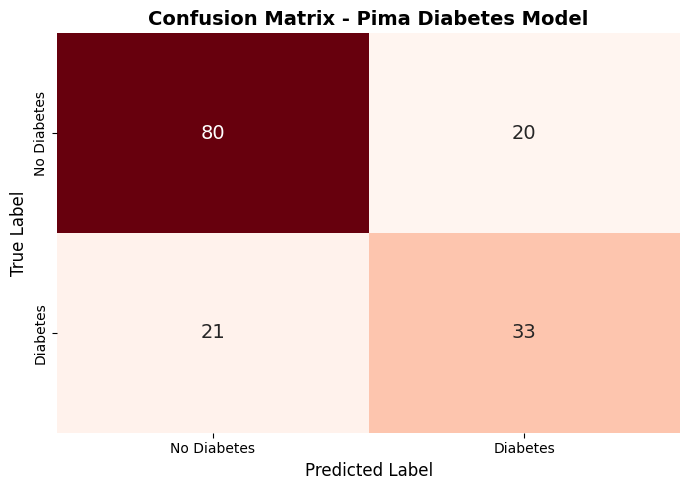

✓ Confusion matrix saved to results/confusion_matrix.png


In [10]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, ax=ax,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'],
            annot_kws={'size': 14})

ax.set_title('Confusion Matrix - Pima Diabetes Model', fontsize=14, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12)
ax.set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.savefig('results/confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Confusion matrix saved to results/confusion_matrix.png")

In [11]:
print("=" * 70)
print("MODEL EVALUATION RESULTS")
print("=" * 70)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\nConfusion Matrix:")
print(cm)

# Detailed confusion matrix interpretation
tn, fp, fn, tp = cm.ravel()

print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (Correct No Diabetes): {tn}")
print(f"False Positives (Wrong Diabetes Alarm): {fp}")
print(f"False Negatives (Missed Diabetes Case): {fn}")
print(f"True Positives (Correct Diabetes Detection): {tp}")

print("\nMedical Interpretation Hint:")
print("⚠ False Negatives are more dangerous in medical diagnosis.")
print("✔ High Recall is important for disease detection.")

# Save metrics to file
import os
os.makedirs('results', exist_ok=True)

metrics_text = f"""MODEL EVALUATION RESULTS
{'=' * 70}

Test Loss: {test_loss:.4f}
Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)

Classification Metrics:
Precision: {precision:.4f}
Recall:    {recall:.4f}
F1 Score:  {f1:.4f}

Confusion Matrix:
{cm}

Confusion Matrix Breakdown:
True Negatives (Correct No Diabetes): {tn}
False Positives (Wrong Diabetes Alarm): {fp}
False Negatives (Missed Diabetes Case): {fn}
True Positives (Correct Diabetes Detection): {tp}
"""

with open('results/metrics_summary.txt', 'w', encoding='utf-8') as f:
    f.write(metrics_text)

print("\n✓ Metrics saved to results/metrics_summary.txt")

MODEL EVALUATION RESULTS

Test Loss: 0.5293
Test Accuracy: 0.7338 (73.38%)

Classification Metrics:
Precision: 0.6226
Recall:    0.6111
F1 Score:  0.6168

Confusion Matrix:
[[80 20]
 [21 33]]

Confusion Matrix Breakdown:
True Negatives (Correct No Diabetes): 80
False Positives (Wrong Diabetes Alarm): 20
False Negatives (Missed Diabetes Case): 21
True Positives (Correct Diabetes Detection): 33

Medical Interpretation Hint:
⚠ False Negatives are more dangerous in medical diagnosis.
✔ High Recall is important for disease detection.

✓ Metrics saved to results/metrics_summary.txt


## Training curves

✓ Training curves saved to results/training_curves.png


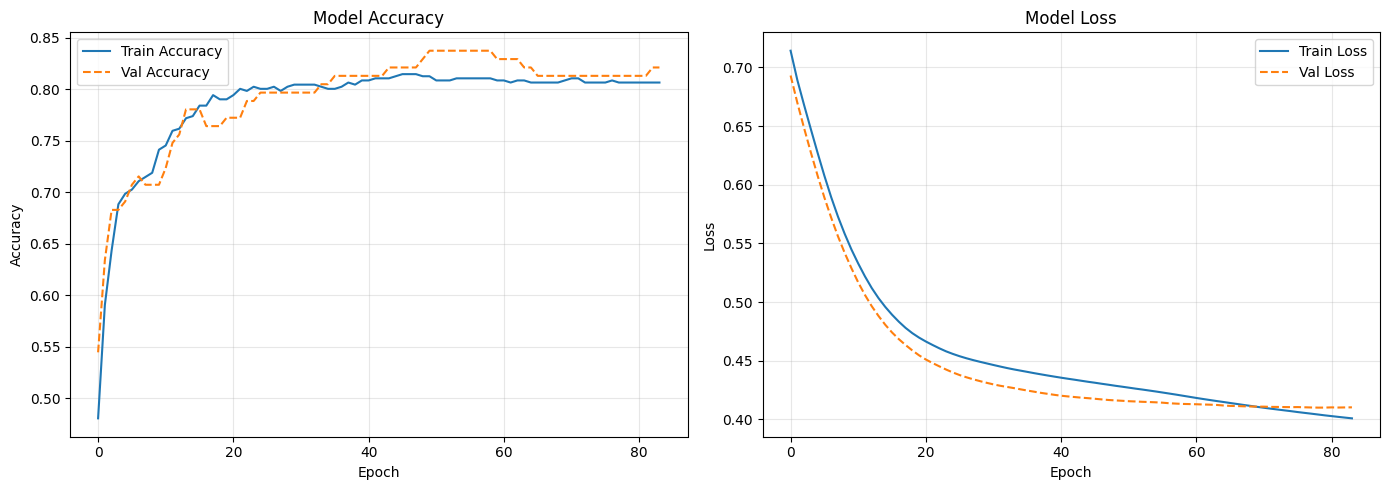

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
axes[0].plot(history.history['binary_accuracy'], label='Train Accuracy')
axes[0].plot(history.history['val_binary_accuracy'], label='Val Accuracy', linestyle='--')
axes[0].set_title("Model Accuracy")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(history.history['loss'], label='Train Loss')
axes[1].plot(history.history['val_loss'], label='Val Loss', linestyle='--')
axes[1].set_title("Model Loss")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
import os

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
accuracy_values = history.history['binary_accuracy']
val_accuracy_values = history.history['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

os.makedirs('results', exist_ok=True)
plt.savefig('results/training_curves.png')

print("✓ Training curves saved to results/training_curves.png")
plt.show()